In [ ]:
pip install pandas seaborn matplotlib scikit-learn

Model Evaluation:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       249
           1       0.29      0.11      0.16        47

    accuracy                           0.82       296
   macro avg       0.57      0.53      0.53       296
weighted avg       0.76      0.82      0.78       296



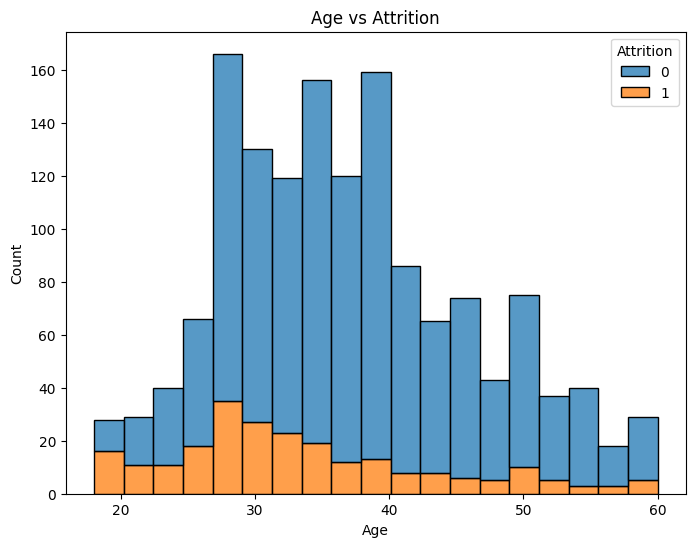

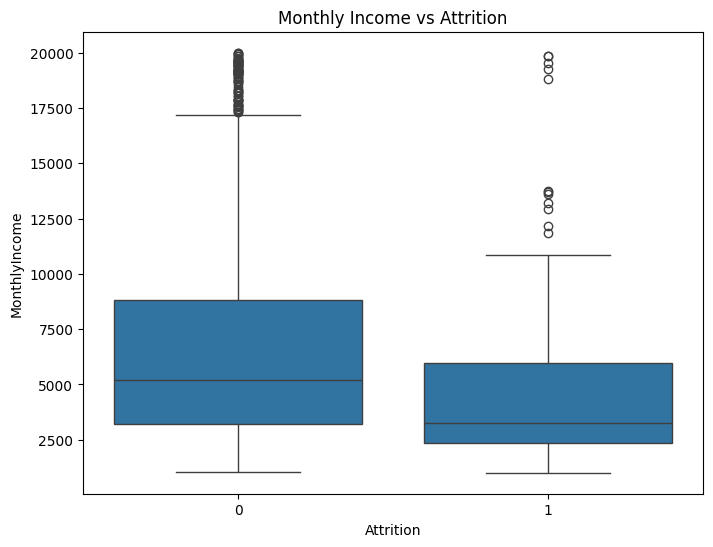

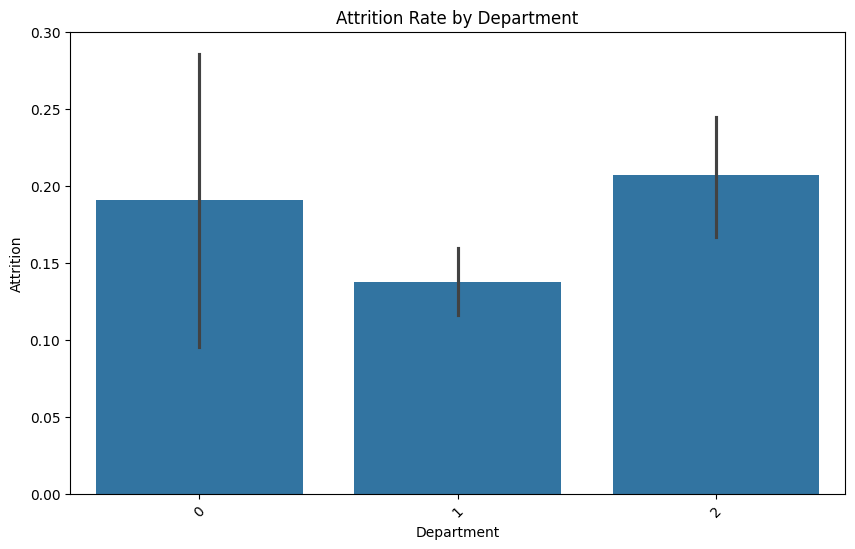

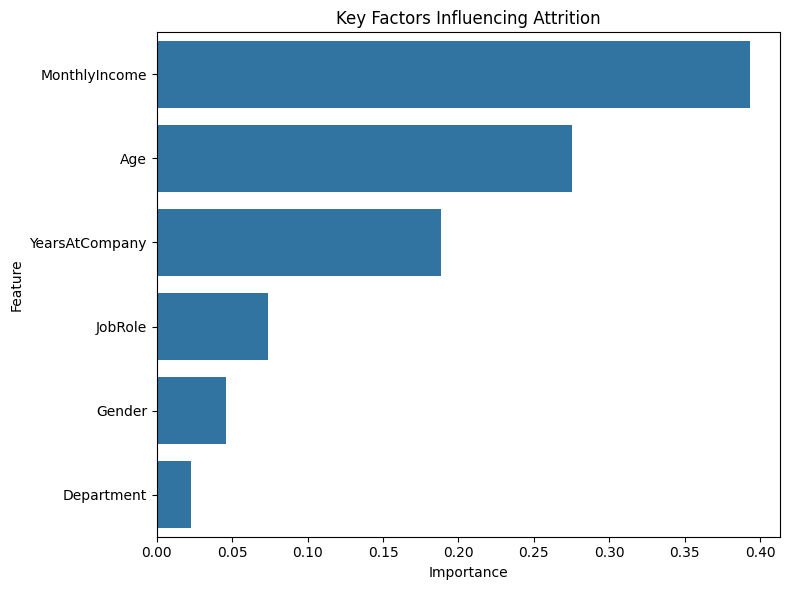

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# --- 1. Load Data Safely ---
# This handles messy CSVs with inconsistent commas
import csv

file_path = '/content/drive/MyDrive/HR_Analytics.csv'

with open(file_path, encoding='utf-8') as f:
    reader = csv.reader(f)
    data = list(reader)

# Extract header and rows
header = data[0]
rows = data[1:]

# Create DataFrame
df = pd.DataFrame(rows, columns=header)

# --- 2. Clean and Convert Columns ---
# Convert numeric columns
numeric_cols = ['Age', 'DailyRate', 'MonthlyIncome', 'HourlyRate', 'YearsAtCompany']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing values
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df = df.dropna(subset=['Attrition'])  # Remove rows without Attrition info

# Encode categorical variables
le = LabelEncoder()
cat_cols = ['Department', 'Gender', 'JobRole', 'MaritalStatus']
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# --- 3. Define Features and Target ---
X = df[['Age', 'MonthlyIncome', 'Department', 'YearsAtCompany', 'JobRole', 'Gender']]
y = df['Attrition']

# --- 4. Train Model ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

preds = model.predict(X_test)
print("Model Evaluation:")
print(classification_report(y_test, preds))

# --- 5. Visualize Key Factors ---

# Age vs Attrition
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack')
plt.title('Age vs Attrition')
plt.show()

# Monthly Income vs Attrition
plt.figure(figsize=(8,6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income vs Attrition')
plt.show()

# Department vs Attrition
plt.figure(figsize=(10,6))
sns.barplot(x='Department', y='Attrition', data=df, estimator=np.mean)
plt.title('Attrition Rate by Department')
plt.xticks(rotation=45)
plt.show()

# Feature Importance
importances = model.feature_importances_
features = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
features = features.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=features)
plt.title('Key Factors Influencing Attrition')
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/drive/MyDrive/HR_Analytics.csv')
df.head()
df.info()
df['Attrition'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

,count
Attrition,
No,1242
Yes,238


In [3]:
attrition_rate = df['Attrition'].value_counts(normalize=True)['Yes'] * 100
print(f"Attrition Rate: {attrition_rate:.2f}%")


Attrition Rate: 16.08%


In [4]:
avg_tenure_leavers = df[df['Attrition'] == 'Yes']['YearsAtCompany'].mean()


In [5]:
dept_attrition = df[df['Attrition'] == 'Yes']['Department'].value_counts()


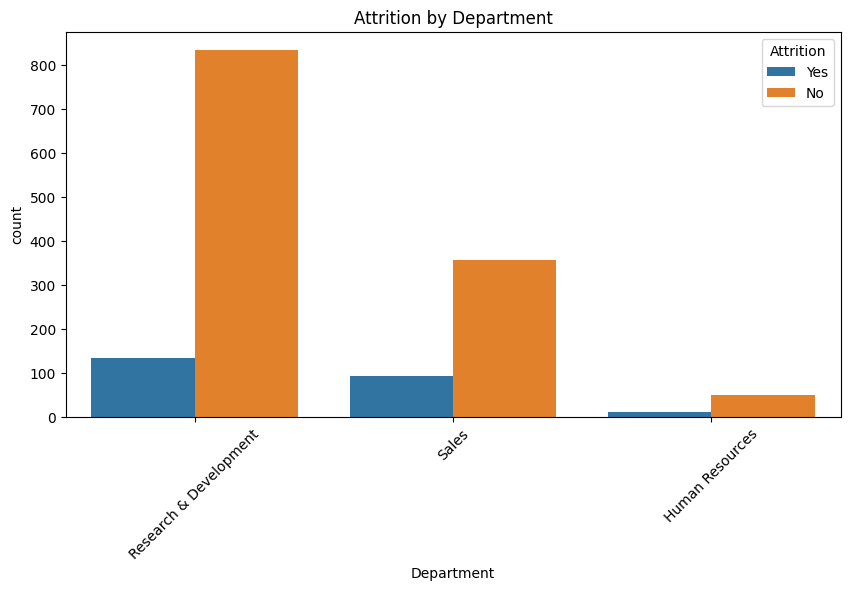

In [6]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title("Attrition by Department")
plt.xticks(rotation=45)
plt.show()


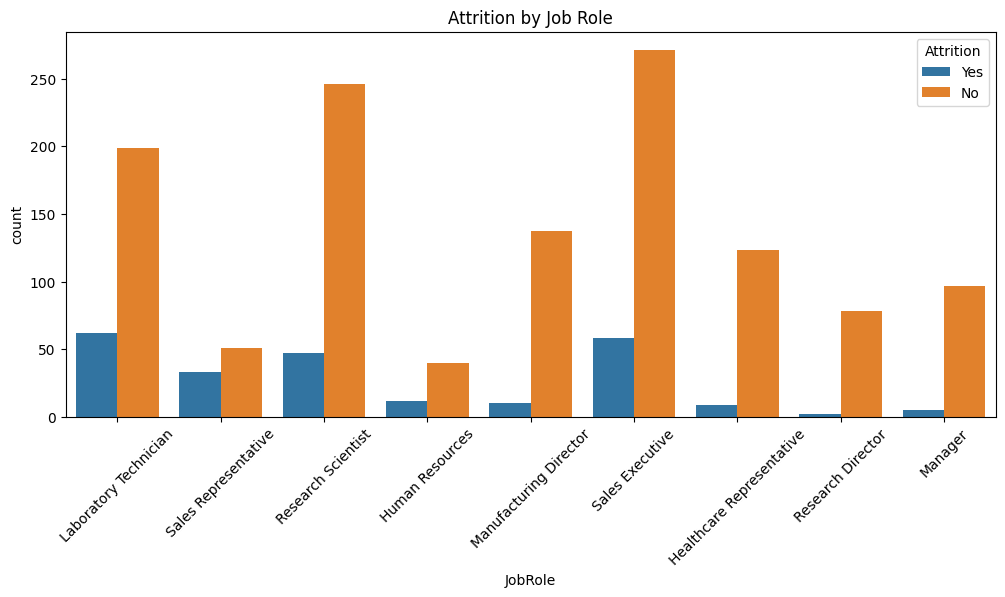

In [7]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='JobRole', hue='Attrition')
plt.title("Attrition by Job Role")
plt.xticks(rotation=45)
plt.show()


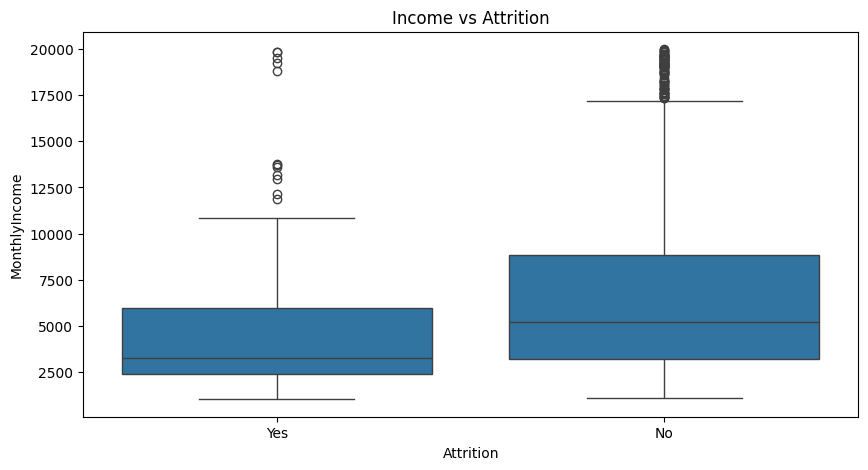

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title("Income vs Attrition")
plt.show()


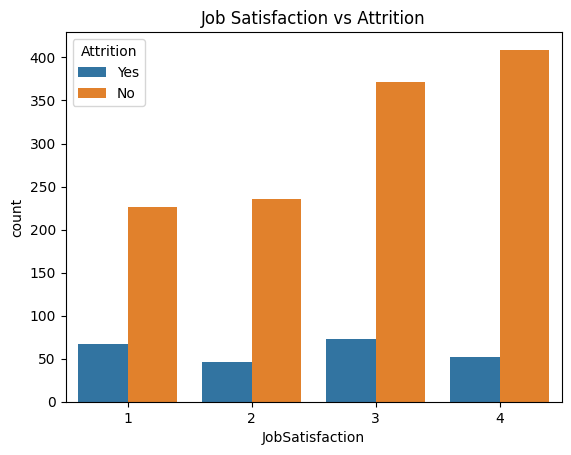

In [9]:
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition')
plt.title("Job Satisfaction vs Attrition")
plt.show()


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/HR_Analytics.csv')  # Update path if needed
df.head()


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [11]:
# 1. Attrition Rate
attrition_rate = df['Attrition'].value_counts(normalize=True)['Yes'] * 100
print(f"✅ Attrition Rate: {attrition_rate:.2f}%")

# 2. Average Tenure of Leavers
avg_tenure = df[df['Attrition'] == 'Yes']['YearsAtCompany'].mean()
print(f"✅ Average Tenure of Leavers: {avg_tenure:.2f} years")

# 3. Average Monthly Income of Leavers vs Stayers
avg_income = df.groupby('Attrition')['MonthlyIncome'].mean()
print("✅ Avg Monthly Income:")
print(avg_income)

# 4. Department-wise Attrition Count
dept_attrition = df[df['Attrition'] == 'Yes']['Department'].value_counts()
print("✅ Department-wise Attrition:")
print(dept_attrition)


✅ Attrition Rate: 16.08%
✅ Average Tenure of Leavers: 5.12 years
✅ Avg Monthly Income:
Attrition
No     6829.294686
Yes    4812.584034
Name: MonthlyIncome, dtype: float64
✅ Department-wise Attrition:
Department
Research & Development    133
Sales                      93
Human Resources            12
Name: count, dtype: int64


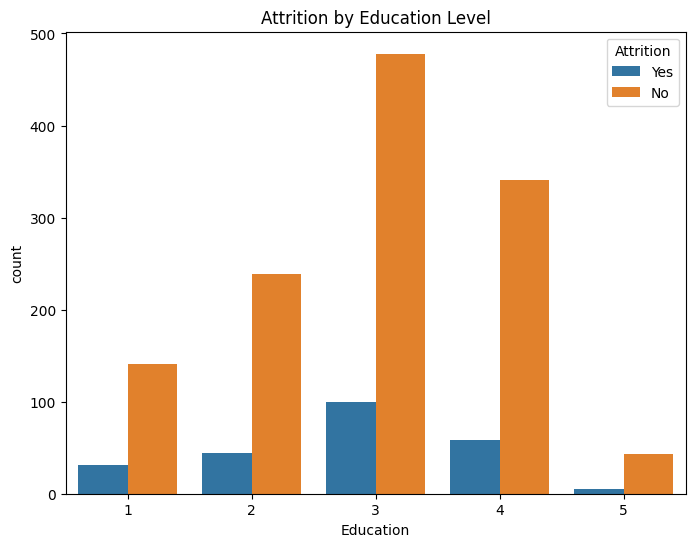